# RFM Analysis: Customer Value Segmentation


In [1]:

import pandas as pd

# Load dataset (first 100,000 rows)
df = pd.read_excel("Online Retail.xlsx", nrows=100000, usecols="A:G")

# Clean data
df.dropna(subset=["CustomerID"], inplace=True)
df["CustomerID"] = df["CustomerID"].astype(str)
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

# Reference date for recency calculation
reference_date = df["InvoiceDate"].max() + pd.Timedelta(days=1)


In [2]:

# Compute RFM metrics
rfm = df.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (reference_date - x.max()).days,
    "InvoiceNo": "nunique",
    "TotalPrice": "sum"
}).reset_index()

rfm.columns = ["CustomerID", "Recency", "Frequency", "Monetary"]

# Assign RFM scores (1–5)
rfm["R_Score"] = pd.qcut(rfm["Recency"], 5, labels=[5, 4, 3, 2, 1])
rfm["F_Score"] = pd.qcut(rfm["Frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm["M_Score"] = pd.qcut(rfm["Monetary"], 5, labels=[1, 2, 3, 4, 5])
rfm["RFM_Score"] = rfm[["R_Score", "F_Score", "M_Score"]].astype(int).sum(axis=1)


In [3]:

# Classify customers by total RFM score
rfm["ValueSegment"] = pd.cut(
    rfm["RFM_Score"],
    bins=[0, 6, 10, 15],
    labels=["Low Value", "Mid Value", "High Value"]
)

# Count customers in each segment
value_counts = rfm["ValueSegment"].value_counts().sort_index()
value_counts


ValueSegment
Low Value     439
Mid Value     648
High Value    577
Name: count, dtype: int64


## Explanation of Value Segments

- **High Value**: Customers with high RFM scores (12–15). They buy frequently, recently, and spend more.
- **Mid Value**: Customers with moderate RFM scores (7–10). Good buyers but not top-tier.
- **Low Value**: Customers with low RFM scores (≤6). They are either inactive, low spenders, or infrequent buyers.

These segments help businesses prioritize marketing and customer service strategies.


Matplotlib created a temporary cache directory at C:\Users\Nike\AppData\Local\Temp\matplotlib-hi8dmc4e because the default path (C:\Users\Nike\.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


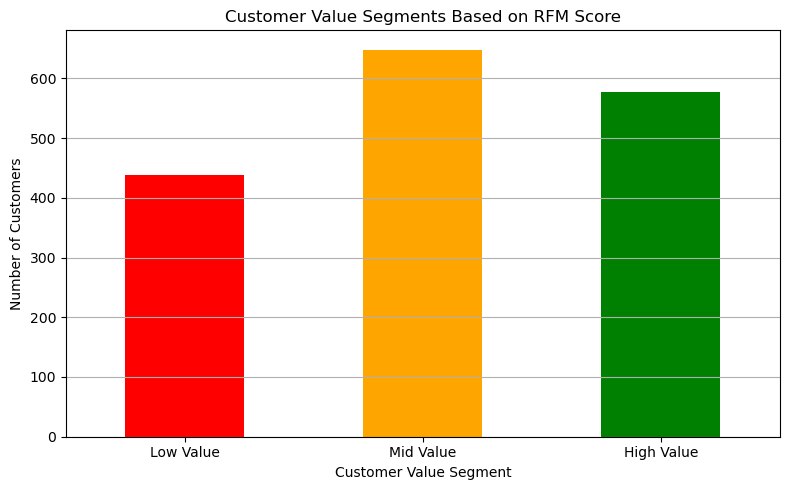

In [7]:

import matplotlib.pyplot as plt

# Plot bar chart
plt.figure(figsize=(8, 5))
value_counts.plot(kind="bar", color=["red", "orange", "green"])
plt.title("Customer Value Segments Based on RFM Score")
plt.xlabel("Customer Value Segment")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [9]:
# Save final dataset
rfm.to_csv ("retail_valuesegmentation.csv", index=False)